In [1]:
#New New New

In [2]:
from os import error
from bs4 import BeautifulSoup
from numpy import string_
import requests
import statsmodels.api as sm
import datetime
import pandas as p
from sklearn import metrics
from patsy import dmatrices
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
athletes=pd.read_csv('C:/Users/A/Downloads/Data Sience Project/res.csv')

C:\Users\A\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
athletes.dtypes
# סוג המשתנים

Unnamed: 0           int64
cm                 float64
city                object
medal               object
noc                 object
age                float64
year of birth      float64
season              object
compettor           object
compettion_year      int64
event               object
pos                 object
kg                  object
sex                 object
dtype: object

In [5]:
athletes.shape
#כמות נתונים

(79718, 14)

In [6]:
athletes.head()
#Show Table

,Unnamed: 0,cm,city,medal,noc,age,year of birth,season,compettor,compettion_year,event,pos,kg,sex
0,0,171.0,Roma,Gold,Soviet Union Ukraine,28.0,1932.0,summer,Boris Shakhlin,1960,"Individual All-Around, Men",1,71,Male
1,0,160.0,Roma,Silver,Japan,29.0,1931.0,summer,Takashi Ono,1960,"Individual All-Around, Men",2,58,Male
2,0,170.0,Roma,Bronze,Russian Federation Soviet Union,25.0,1935.0,summer,Yury Titov,1960,"Individual All-Around, Men",3,70,Male
3,0,158.0,Roma,NaN,Japan,22.0,1938.0,summer,Shuji Tsurumi,1960,"Individual All-Around, Men",4,52,Male
4,0,161.0,Roma,NaN,Japan,23.0,1937.0,summer,Yukio Endo,1960,"Individual All-Around, Men",=5,58,Male


In [7]:
medal_num={'Gold':1,'Silver':1,'Bronze':1}
sex_num={'Female':1,'Male':0}
athletes.medal.replace(medal_num,inplace=True)
athletes.sex.replace(sex_num,inplace=True)
athletes = athletes.iloc[: , 1:]
athletes.head()#Show Table
#Convert the medal and the sex column to numbers

,cm,city,medal,noc,age,year of birth,season,compettor,compettion_year,event,pos,kg,sex
0,171.0,Roma,1.0,Soviet Union Ukraine,28.0,1932.0,summer,Boris Shakhlin,1960,"Individual All-Around, Men",1,71,0
1,160.0,Roma,1.0,Japan,29.0,1931.0,summer,Takashi Ono,1960,"Individual All-Around, Men",2,58,0
2,170.0,Roma,1.0,Russian Federation Soviet Union,25.0,1935.0,summer,Yury Titov,1960,"Individual All-Around, Men",3,70,0
3,158.0,Roma,NaN,Japan,22.0,1938.0,summer,Shuji Tsurumi,1960,"Individual All-Around, Men",4,52,0
4,161.0,Roma,NaN,Japan,23.0,1937.0,summer,Yukio Endo,1960,"Individual All-Around, Men",=5,58,0


In [8]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79718 entries, 0 to 79717
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cm               72824 non-null  float64
 1   city             79718 non-null  object 
 2   medal            8641 non-null   float64
 3   noc              79718 non-null  object 
 4   age              78861 non-null  float64
 5   year of birth    78861 non-null  float64
 6   season           79718 non-null  object 
 7   compettor        79718 non-null  object 
 8   compettion_year  79718 non-null  int64  
 9   event            79718 non-null  object 
 10  pos              77518 non-null  object 
 11  kg               72824 non-null  object 
 12  sex              79718 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 7.9+ MB


In [9]:
athletes.isnull().sum()

cm                  6894
city                   0
medal              71077
noc                    0
age                  857
year of birth        857
season                 0
compettor              0
compettion_year        0
event                  0
pos                 2200
kg                  6894
sex                    0
dtype: int64

In [10]:
athletes['pos'] = athletes['pos'].fillna(0)
athletes['medal'] = athletes['medal'].fillna(0)
athletes.head()
# Replacing all the NaN values to 0 in the pos column.

,cm,city,medal,noc,age,year of birth,season,compettor,compettion_year,event,pos,kg,sex
0,171.0,Roma,1.0,Soviet Union Ukraine,28.0,1932.0,summer,Boris Shakhlin,1960,"Individual All-Around, Men",1,71,0
1,160.0,Roma,1.0,Japan,29.0,1931.0,summer,Takashi Ono,1960,"Individual All-Around, Men",2,58,0
2,170.0,Roma,1.0,Russian Federation Soviet Union,25.0,1935.0,summer,Yury Titov,1960,"Individual All-Around, Men",3,70,0
3,158.0,Roma,0.0,Japan,22.0,1938.0,summer,Shuji Tsurumi,1960,"Individual All-Around, Men",4,52,0
4,161.0,Roma,0.0,Japan,23.0,1937.0,summer,Yukio Endo,1960,"Individual All-Around, Men",=5,58,0


In [11]:
athletes.duplicated().sum()
#sum the duplicated rows

894

In [12]:
athletes.drop_duplicates()
# delete the double rows

,cm,city,medal,noc,age,year of birth,season,compettor,compettion_year,event,pos,kg,sex
0,171.0,Roma,1.0,Soviet Union Ukraine,28.0,1932.0,summer,Boris Shakhlin,1960,"Individual All-Around, Men",1,71,0
1,160.0,Roma,1.0,Japan,29.0,1931.0,summer,Takashi Ono,1960,"Individual All-Around, Men",2,58,0
2,170.0,Roma,1.0,Russian Federation Soviet Union,25.0,1935.0,summer,Yury Titov,1960,"Individual All-Around, Men",3,70,0
3,158.0,Roma,0.0,Japan,22.0,1938.0,summer,Shuji Tsurumi,1960,"Individual All-Around, Men",4,52,0
4,161.0,Roma,0.0,Japan,23.0,1937.0,summer,Yukio Endo,1960,"Individual All-Around, Men",=5,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79713,NaN,Tokyo,0.0,Ukraine,26.0,1994.0,summer,Mykola Prostorov,2020,"Individual, Men",12 r1/2,NaN,0
79714,NaN,Tokyo,0.0,United States,25.0,1995.0,summer,Aliaksei Shostak,2020,"Individual, Men",13 r1/2,NaN,0
79715,170.0,Tokyo,0.0,People's Republic of China,28.0,1992.0,summer,Gao Lei,2020,"Individual, Men",14 r1/2,64.0,0
79716,NaN,Tokyo,0.0,Japan,23.0,1997.0,summer,Ryosuke Sakai,2020,"Individual, Men",15 r1/2,NaN,0


In [13]:
#athletes = athletes.drop(athletes.index[athletes.age == "None"])
athletes=athletes.dropna()
athletes["age"] = athletes["age"].astype("int") 
athletes["medal"] = athletes["medal"].astype("int") 
athletes["year of birth"] = athletes["year of birth"].astype("int") 
athletes.head()
#athletes["medal"] = athletes["medal"].astype("int") 
#athletes["year of birth"] = athletes["year of birth"].astype("int") 
#athletes.dtypes
#Convert object to int (age, year of birth)

,cm,city,medal,noc,age,year of birth,season,compettor,compettion_year,event,pos,kg,sex
0,171.0,Roma,1,Soviet Union Ukraine,28,1932,summer,Boris Shakhlin,1960,"Individual All-Around, Men",1,71,0
1,160.0,Roma,1,Japan,29,1931,summer,Takashi Ono,1960,"Individual All-Around, Men",2,58,0
2,170.0,Roma,1,Russian Federation Soviet Union,25,1935,summer,Yury Titov,1960,"Individual All-Around, Men",3,70,0
3,158.0,Roma,0,Japan,22,1938,summer,Shuji Tsurumi,1960,"Individual All-Around, Men",4,52,0
4,161.0,Roma,0,Japan,23,1937,summer,Yukio Endo,1960,"Individual All-Around, Men",=5,58,0


C:\Users\A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

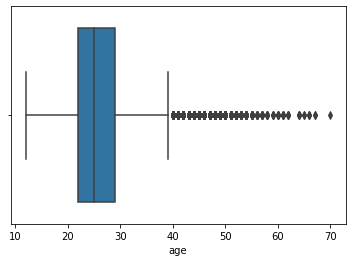

In [14]:
sns.boxplot(athletes.age)
#גרף לחריגים בגילאים

In [15]:
athletes.age.describe()
#מראה את הגיל המינימאלי מקסימלי וכו

count    72701.000000
mean        25.763318
std          5.536634
min         12.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         70.000000
Name: age, dtype: float64

In [16]:
top_10_countries=athletes.noc.value_counts().sort_values(ascending=False).head(10)
top_10_countries
#עשר המדינות הטובות בעולם
#בכמות אנשים שהתחרו

United States    3995
Canada           2799
Japan            2727
Great Britain    2390
Hungary          2123
Australia        2104
Poland           2071
France           2053
Germany          1838
Italy            1820
Name: noc, dtype: int64

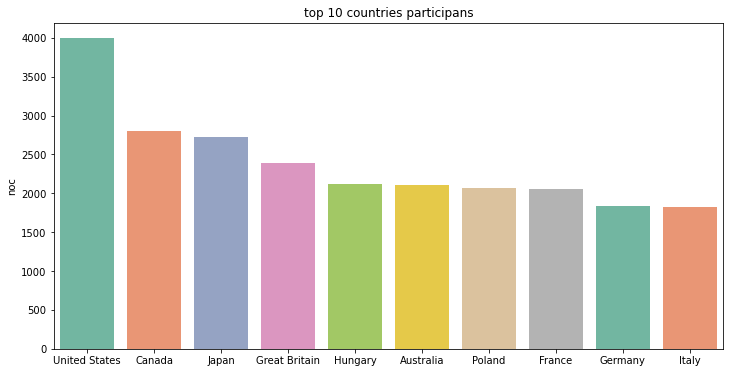

In [17]:
#plot for the top 10 countries-participans

plt.figure(figsize=(12,6))
plt.title('top 10 countries participans')
sns.barplot(x=top_10_countries.index,y=top_10_countries,palette='Set2');

In [18]:
gender_counts=athletes.sex.value_counts()
gender_counts

0    53441
1    19260
Name: sex, dtype: int64

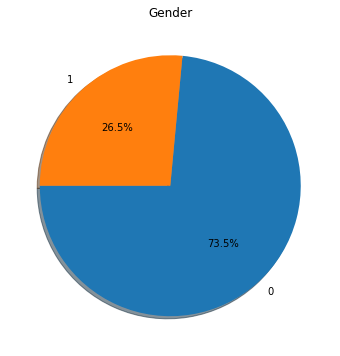

In [19]:
plt.figure(figsize=(12,6))
plt.title('Gender')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180,shadow=True);

(array([0.0000e+00, 3.0000e+01, 8.1900e+02, 2.6500e+03, 4.3560e+03,
        7.2360e+03, 1.0610e+04, 1.1970e+04, 1.0362e+04, 9.0150e+03,
        6.5920e+03, 3.4580e+03, 2.3440e+03, 1.3120e+03, 5.2300e+02,
        4.2500e+02, 2.8500e+02, 2.2300e+02, 1.6800e+02, 1.0800e+02,
        7.3000e+01, 4.8000e+01, 3.6000e+01, 1.9000e+01, 1.1000e+01,
        1.2000e+01, 4.0000e+00, 6.0000e+00, 5.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

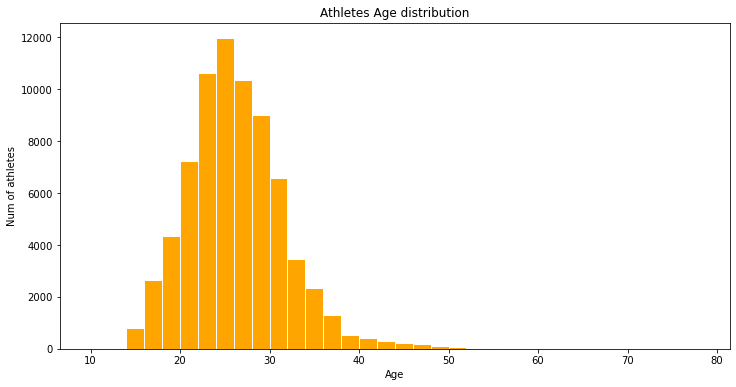

In [20]:
plt.figure(figsize=(12,6))
plt.title("Athletes Age distribution")
plt.xlabel("Age")
plt.ylabel("Num of athletes")
plt.hist(athletes.age, bins=np.arange(10,80,2),color='orange',edgecolor='white')

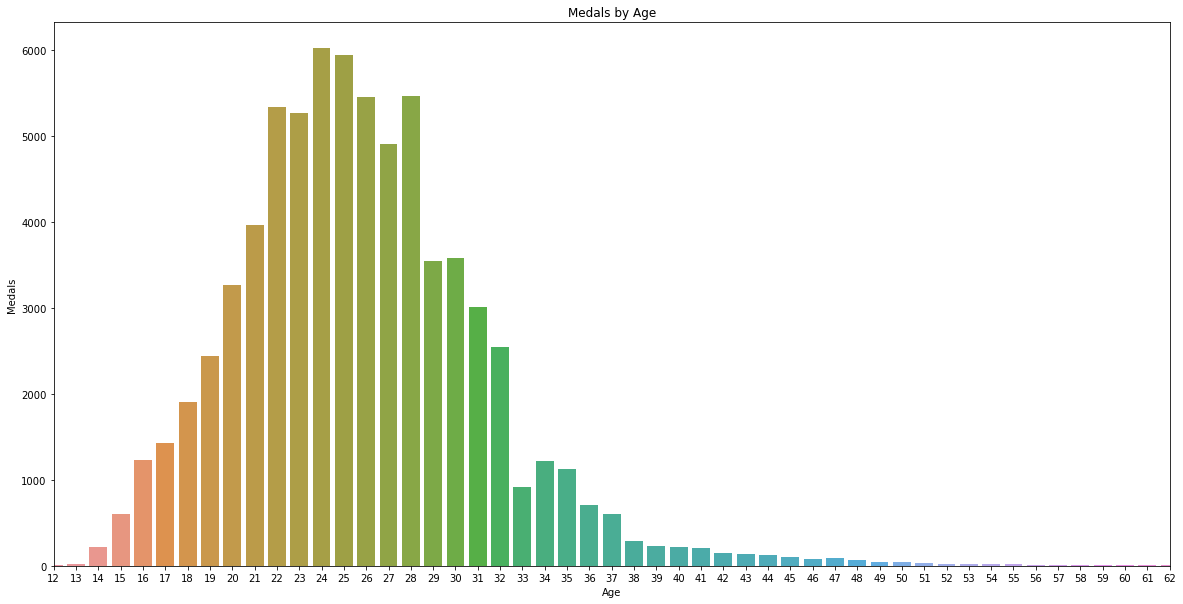

In [21]:
plt.figure(figsize=(20, 10))
a_medal=athletes.groupby('age')['medal'].count().reset_index()
sns.barplot(x='age',y='medal',data=a_medal)
plt.title('Medals by Age')
plt.xlim(0,50)
plt.xlabel('Age')
plt.ylabel('Medals')
plt.show()

In [22]:
Contingent_Size=athletes.copy()
Contingent_Size['total_athletes']=''
Contingent_Size=Contingent_Size.loc[:,['compettion_year', 'noc','total_athletes']].groupby(['compettion_year', 'noc']).count().reset_index()
Contingent_Size=Contingent_Size.rename(columns={'noc':'Country Name','compettion_year':'Year'})
Contingent_Size.head()

#גודל משלחת לפי שנה ולפי מדינה

#add a grafh

,Year,Country Name,total_athletes
0,1960,Afghanistan,79
1,1960,Algeria France,4
2,1960,Argentina,38
3,1960,Armenia Soviet Union,4
4,1960,Australia,161


In [23]:
###########################
#athletes_=pd.read_csv('C:/Users/A/Downloads/Data Sience Project/test.csv')
#athletes_.dtypes
###########################
#Fix it after the new csv file.

Text(0.5, 0, 'compettion_year')

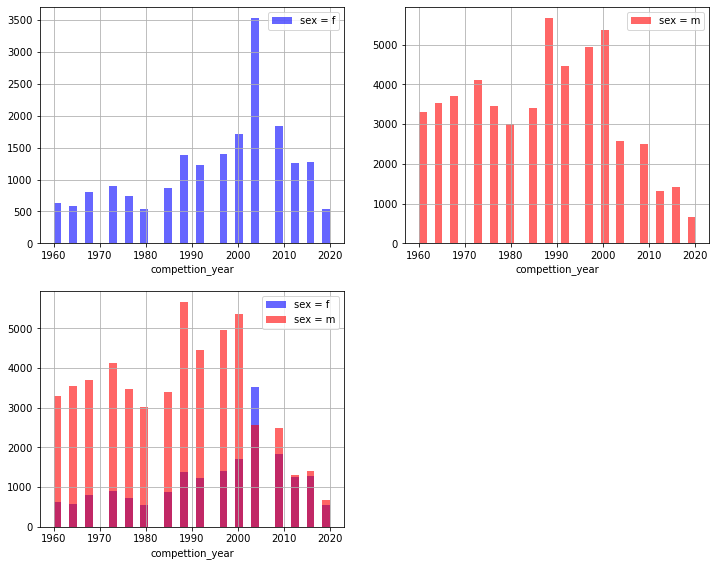

In [24]:
plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
athletes[athletes["sex"] == 1]["compettion_year"].hist(bins=35, color='blue', label='sex = f', alpha=0.6)
plt.legend()
plt.xlabel("compettion_year")

plt.subplot(4, 2, 2)
athletes[athletes["sex"] ==0]["compettion_year"].hist(bins=35, color='red', label='sex = m', alpha=0.6)
plt.legend()
plt.xlabel("compettion_year")

plt.subplot(4, 2, 3)
athletes[athletes["sex"] == 1]["compettion_year"].hist(bins=35, color='blue', label='sex = f', alpha=0.6)
athletes[athletes["sex"] == 0]["compettion_year"].hist(bins=35, color='red', label='sex = m', alpha=0.6)
plt.legend()
plt.xlabel("compettion_year")


#לשנות בהתאם לקובץ החדש 
#לדוגמא פיימייל ומייל צריכים להיות אפס ואחד וכו

In [25]:
pop = pd.read_csv('C:/Users/A/Downloads/Data Sience Project/pop.csv')
pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

pop = pd.melt(pop, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'World Population')

pop['Year'] = pd.to_numeric(pop['Year'])
pop.head()


,Country Name,Country Code,Year,World Population
0,Aruba,ABW,1960,54208.0
1,Africa Eastern and Southern,AFE,1960,130836765.0
2,Afghanistan,AFG,1960,8996967.0
3,Africa Western and Central,AFW,1960,96396419.0
4,Angola,AGO,1960,5454938.0


In [26]:
w_pop = pd.read_csv('C:/Users/A/Downloads/Data Sience Project/womanPopulation.csv')
w_pop = w_pop.dropna()
w_pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

w_pop = pd.melt(w_pop, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'Woman Population%')

w_pop['Year'] = pd.to_numeric(w_pop['Year'])

w_pop.head()


,Country Name,Country Code,Year,Woman Population%
0,Aruba,ABW,1960,50.979560
1,Africa Eastern and Southern,AFE,1960,50.550028
2,Afghanistan,AFG,1960,48.320662
3,Africa Western and Central,AFW,1960,50.206989
4,Angola,AGO,1960,49.335629


In [27]:
gdp = pd.read_csv('C:/Users/A/Downloads/Data Sience Project/w_gdp.csv')

gdp.drop(['Indicator Name' , 'Indicator Code'], axis = 1, inplace = True)

gdp = pd.melt(gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'gdp')

gdp['Year'] = pd.to_numeric(gdp['Year'])


gdp.head()


,Country Name,Country Code,Year,gdp
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [28]:
athletes=athletes.rename(columns={'noc':'Country Name','compettion_year':'Year'})

print(athletes)

          cm   city  medal                                   Country Name  \
0      171.0   Roma      1                          Soviet Union  Ukraine   
1      160.0   Roma      1                                          Japan   
2      170.0   Roma      1               Russian Federation  Soviet Union   
3      158.0   Roma      0                                          Japan   
4      161.0   Roma      0                                          Japan   
...      ...    ...    ...                                            ...   
79705  173.0  Tokyo      0                                        Belarus   
79706  177.0  Tokyo      0  Russian Federation  Russian Olympic Committee   
79707  175.0  Tokyo      0  Russian Federation  Russian Olympic Committee   
79712  184.0  Tokyo      0                                       Portugal   
79715  170.0  Tokyo      0                     People's Republic of China   

       age  year of birth  season             compettor  Year  \
0       28

In [29]:
athletes_merge=pop.merge(gdp, how='inner', on=['Country Name','Year','Country Code'])
athletes_merge=athletes_merge.merge(w_pop, how='inner', on=['Country Name','Year','Country Code'])

#athletes_merge=athletes_merge.merge(Contingent_Size, how='inner', on=['Country Name','Year'])


athletes_merge=athletes_merge.merge(athletes, how='inner', on=['Country Name','Year'])


athletes_merge.head()

,Country Name,Country Code,Year,World Population,gdp,Woman Population%,cm,city,medal,age,year of birth,season,compettor,event,pos,kg,sex
0,Afghanistan,AFG,1960,8996967.0,537777811.0,48.320662,178.0,Roma,0,20,1940,summer,Abdul Hadi Shekaib,"100 metres, Men",7 h6 r1/4,68,0
1,Afghanistan,AFG,1960,8996967.0,537777811.0,48.320662,170.0,Roma,0,24,1936,summer,Habib Sayed,"400 metres, Men",7 h1 r1/4,58,0
2,Afghanistan,AFG,1960,8996967.0,537777811.0,48.320662,172.0,Roma,0,23,1937,summer,Abdul Ghafar Ghafoori,"1,500 metres, Men",DNS,70,0
3,Afghanistan,AFG,1960,8996967.0,537777811.0,48.320662,179.0,Roma,0,20,1940,summer,Abdul Wardak,"110 metres Hurdles, Men",AC h2 r1/4,75,0
4,Afghanistan,AFG,1960,8996967.0,537777811.0,48.320662,179.0,Roma,0,20,1940,summer,Abdul Wardak,"Javelin Throw, Men",28 r1/2,75,0


In [30]:
athletes_merge.isnull().sum()


Country Name            0
Country Code            0
Year                    0
World Population        6
gdp                  6317
Woman Population%       0
cm                      0
city                    0
medal                   0
age                     0
year of birth           0
season                  0
compettor               0
event                   0
pos                     0
kg                      0
sex                     0
dtype: int64

In [31]:
medal_per_country_per_year=athletes_merge.groupby(['Year','Country Name']).agg({'medal':'sum'}).reset_index()
medal_per_country_per_year.head()


,Year,Country Name,medal
0,1960,Afghanistan,0
1,1960,Argentina,0
2,1960,Australia,10
3,1960,Austria,1
4,1960,Belgium,3


In [32]:
medal_per_country_per_year=medal_per_country_per_year.merge(Contingent_Size, how='inner', on=['Country Name','Year'])
medal_per_country_per_year=medal_per_country_per_year.merge(gdp, how='inner', on=['Country Name','Year'])
medal_per_country_per_year=medal_per_country_per_year.merge(pop, how='inner', on=['Country Name','Year','Country Code'])
medal_per_country_per_year.drop('Country Code', axis = 1, inplace = True)

medal_per_country_per_year.head()

,Year,Country Name,medal,total_athletes,gdp,World Population
0,1960,Afghanistan,0,79,5.377778e+08,8996967.0
1,1960,Argentina,0,38,NaN,20481781.0
2,1960,Australia,10,161,1.859335e+10,10276477.0
3,1960,Austria,1,54,6.592694e+09,7047539.0
4,1960,Belgium,3,55,1.165872e+10,9153489.0


In [33]:
medal_per_country_per_year.dropna(how = 'any', inplace = True)

medal_per_country_per_year[medal_per_country_per_year['gdp'].apply(lambda x: str(x).isdigit())]

medal_per_country_per_year["gdp"] = medal_per_country_per_year["gdp"].astype("float") 

medal_per_country_per_year["total_athletes"] = medal_per_country_per_year["total_athletes"].astype("float") 

medal_per_country_per_year.head()

,Year,Country Name,medal,total_athletes,gdp,World Population
0,1960,Afghanistan,0,79.0,5.377778e+08,8996967.0
2,1960,Australia,10,161.0,1.859335e+10,10276477.0
3,1960,Austria,1,54.0,6.592694e+09,7047539.0
4,1960,Belgium,3,55.0,1.165872e+10,9153489.0
5,1960,Brazil,0,4.0,1.516557e+10,72179235.0


In [34]:
###############################################
athletes1=athletes.drop(['cm','age','year of birth','season','pos','kg'], axis = 1)

athletes1=athletes1.merge(gdp, how='inner', on=['Country Name','Year'])
athletes1=athletes1.merge(pop, how='inner', on=['Country Name','Year','Country Code'])
athletes1.drop('Country Code', axis = 1, inplace = True)

athletes1=athletes1.dropna()

athletes1

,city,medal,Country Name,compettor,Year,event,sex,gdp,World Population
0,Roma,1,Japan,Takashi Ono,1960,"Individual All-Around, Men",0,4.430734e+10,93216000.0
1,Roma,0,Japan,Shuji Tsurumi,1960,"Individual All-Around, Men",0,4.430734e+10,93216000.0
2,Roma,0,Japan,Yukio Endo,1960,"Individual All-Around, Men",0,4.430734e+10,93216000.0
3,Roma,0,Japan,Masao Takemoto,1960,"Individual All-Around, Men",0,4.430734e+10,93216000.0
4,Roma,0,Japan,Nobuyuki Aihara,1960,"Individual All-Around, Men",0,4.430734e+10,93216000.0
...,...,...,...,...,...,...,...,...,...
55329,Rio de Janeiro,0,Cambodia,Hem Thon Vitiny,2016,"50 metres Freestyle, Women",1,2.001675e+10,15766290.0
55330,Rio de Janeiro,0,Togo,Adzo Kpossi,2016,"50 metres Freestyle, Women",1,4.399996e+09,7509952.0
55331,Rio de Janeiro,0,Central African Republic,Chloé Sauvourel,2016,"50 metres Freestyle, Women",1,1.756125e+09,4537683.0
55332,Rio de Janeiro,0,Vanuatu,Yoshua Shing,2016,"Singles, Men",0,7.735029e+08,278326.0


In [35]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [36]:
categorical_features = ['city', 'medal', 'Country Name', 'compettor', 'Year', 'event', 'sex']
ordinal = OrdinalEncoder()
athletes1[categorical_features] = ordinal.fit_transform(athletes1[categorical_features])
athletes1
# משתנה קטג

,city,medal,Country Name,compettor,Year,event,sex,gdp,World Population
0,11.0,1.0,78.0,19212.0,0.0,217.0,0.0,4.430734e+10,93216000.0
1,11.0,0.0,78.0,18315.0,0.0,217.0,0.0,4.430734e+10,93216000.0
2,11.0,0.0,78.0,21185.0,0.0,217.0,0.0,4.430734e+10,93216000.0
3,11.0,0.0,78.0,13236.0,0.0,217.0,0.0,4.430734e+10,93216000.0
4,11.0,0.0,78.0,14975.0,0.0,217.0,0.0,4.430734e+10,93216000.0
...,...,...,...,...,...,...,...,...,...
55329,10.0,0.0,30.0,7575.0,14.0,60.0,1.0,2.001675e+10,15766290.0
55330,10.0,0.0,153.0,201.0,14.0,60.0,1.0,4.399996e+09,7509952.0
55331,10.0,0.0,34.0,3316.0,14.0,60.0,1.0,1.756125e+09,4537683.0
55332,10.0,0.0,166.0,21125.0,14.0,360.0,0.0,7.735029e+08,278326.0


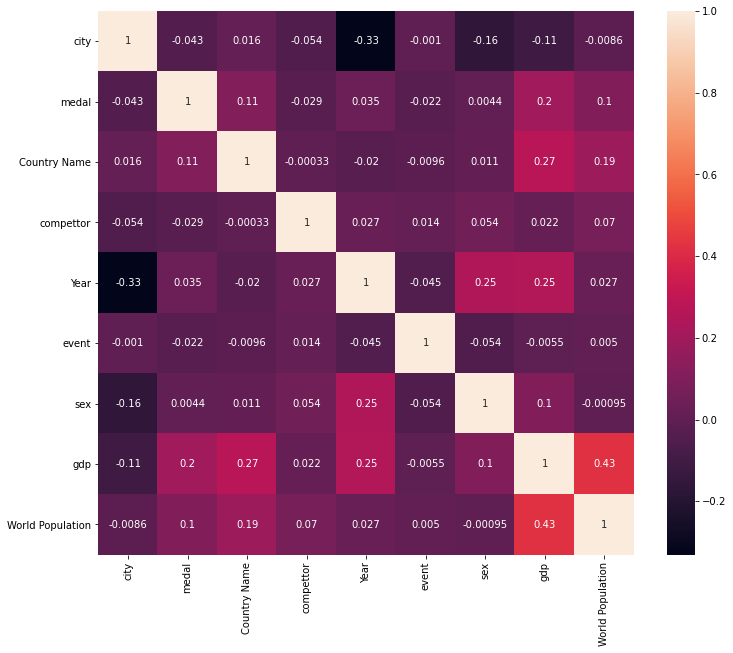

In [37]:
corr = athletes1.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True);

In [61]:
#getting our X and y
#del athletes1['compettor']
#del athletes1['city']
#del athletes1['sex']


X = athletes1.drop('medal',axis=1)
y = athletes1['medal']

In [62]:
from  sklearn.model_selection import train_test_split

#splitting X and y in training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [63]:
X_train.shape, y_train.shape

((34117, 8), (34117,))

In [64]:
X_test.shape, y_test.shape

((14622, 8), (14622,))

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

numerical_columns = [col for col in athletes1.columns if ((athletes1.dtypes[col] != 'object') & (col not in ['medal','Year']))]

sc = StandardScaler()
X_train[numerical_columns] = sc.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = sc.transform(X_test[numerical_columns])

X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
y_pred = rf.predict(X_test)


In [67]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n\n", classification_report(y_test, y_pred))


Classification Report:

               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     10504
         1.0       0.82      0.67      0.74      4118

    accuracy                           0.87     14622
   macro avg       0.85      0.81      0.82     14622
weighted avg       0.86      0.87      0.86     14622



In [68]:
rf.score(X_test, y_test)

0.8652031185884284

In [69]:
y_predicted = rf.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[9903,  601],
       [1370, 2748]], dtype=int64)

Text(69.0, 0.5, 'Truth')

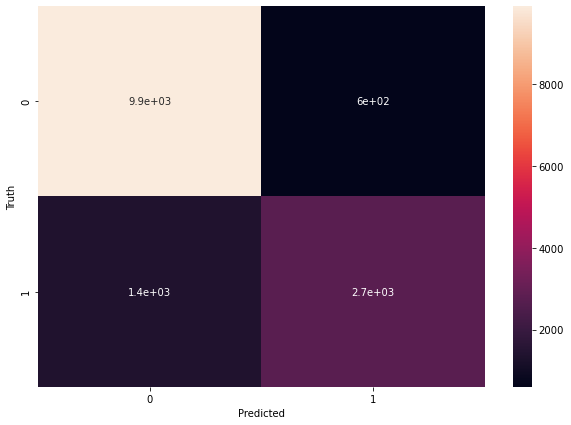

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

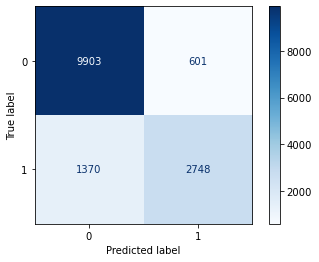

In [72]:
from sklearn.metrics import plot_confusion_matrix


disp = plot_confusion_matrix(rf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['0', '1'])

In [74]:
# Create a random forest classifier
rf = rf.fit(X, y)
rf.score(X, y)

# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

# We can sort the features by their importance
sorted(zip(rf.feature_importances_, X), reverse=True)

# the decision tree and random forest have very similar values

[(0.3466356974509544, 'event'),
 (0.2853868963361014, 'compettor'),
 (0.08669477774572526, 'Year'),
 (0.08263736756252085, 'gdp'),
 (0.0757422080144452, 'World Population'),
 (0.06377523493511245, 'Country Name'),
 (0.04678456104275338, 'city'),
 (0.012343256912387081, 'medal')]